In [47]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('https://raw.githubusercontent.com/RodriNico2206/Data-science-s-projects/refs/heads/master/Salary_Prediction-Streamlit/employee_attrition_data.csv')

In [48]:
#first 10 rows
data.head(10)

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0
5,5,47,Male,Sales,HR Specialist,10,0.889018,237,0,97212,0
6,6,58,Male,Marketing,HR Specialist,5,0.688977,155,1,97865,0
7,7,57,Female,Sales,Analyst,8,0.981679,171,0,50113,0
8,8,34,Female,Finance,Accountant,6,0.010381,177,1,88747,1
9,9,57,Female,Marketing,Engineer,7,0.466782,170,0,43283,0


In [49]:
#last 10 rows
data.tail(10)

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
990,990,36,Female,Engineering,Accountant,9,0.558512,182,1,65638,1
991,991,47,Male,Marketing,Manager,2,0.889621,243,0,78726,1
992,992,46,Female,HR,Analyst,8,0.955095,176,1,79044,1
993,993,47,Female,HR,Analyst,5,0.932450,193,0,47301,0
994,994,47,Male,Marketing,HR Specialist,2,0.992018,186,1,31507,0
995,995,39,Female,HR,HR Specialist,3,0.377435,239,0,71403,0
996,996,50,Male,Engineering,Manager,1,0.431152,154,0,30181,1
997,997,52,Male,Engineering,Analyst,3,0.647102,206,0,64143,0
998,998,37,Female,HR,HR Specialist,2,0.304813,241,0,74383,1
999,999,59,Male,Sales,HR Specialist,1,0.940510,159,0,73220,1


In [50]:
#general info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee_ID            1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Department             1000 non-null   object 
 4   Job_Title              1000 non-null   object 
 5   Years_at_Company       1000 non-null   int64  
 6   Satisfaction_Level     1000 non-null   float64
 7   Average_Monthly_Hours  1000 non-null   int64  
 8   Promotion_Last_5Years  1000 non-null   int64  
 9   Salary                 1000 non-null   int64  
 10  Attrition              1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


In [51]:
#nulls per column
data.isna().sum()

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

In [52]:
#records duplicated per column
if data.duplicated().sum():
    data.duplicated().sum()
else:
    print('there are no records duplicated')

there are no records duplicated


In [53]:
#columns of data set
data.columns

Index(['Employee_ID', 'Age', 'Gender', 'Department', 'Job_Title',
       'Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours',
       'Promotion_Last_5Years', 'Salary', 'Attrition'],
      dtype='object')

In [54]:
#drop column Employee_ID
data.drop(columns= 'Employee_ID', inplace= True)

#new data set
data.head(10)

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0
5,47,Male,Sales,HR Specialist,10,0.889018,237,0,97212,0
6,58,Male,Marketing,HR Specialist,5,0.688977,155,1,97865,0
7,57,Female,Sales,Analyst,8,0.981679,171,0,50113,0
8,34,Female,Finance,Accountant,6,0.010381,177,1,88747,1
9,57,Female,Marketing,Engineer,7,0.466782,170,0,43283,0


Text(0.5, 1.0, 'Counting of employee per Gender')

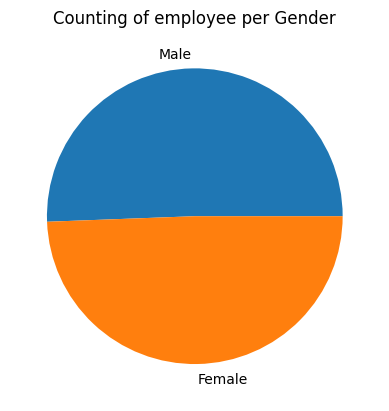

In [55]:
#pie chart to gender column
data['Gender'].value_counts().plot(kind = 'pie')
plt.ylabel('')
plt.title('Counting of employee per Gender')

Text(0.5, 1.0, 'Average Salary by Job title')

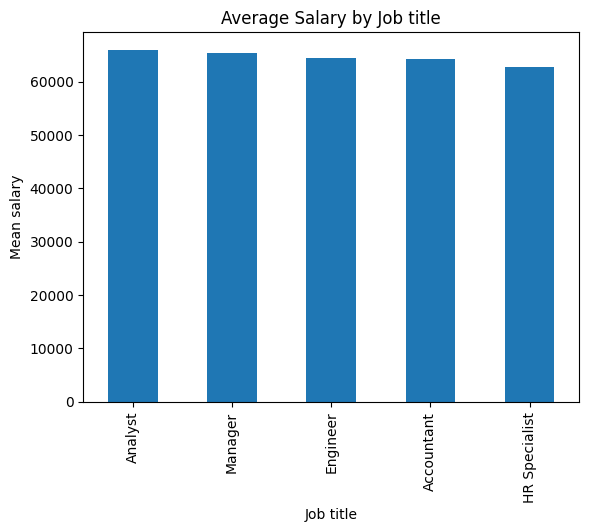

In [56]:
#bar chart of Salary mean by Job_Title
data.groupby('Job_Title')['Salary'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Mean salary')
plt.xlabel('Job title')
plt.title('Average Salary by Job title')

In [57]:
#mean salary by department and Promotion_Last_5Years turned it into data frame
data.groupby(['Department', 'Promotion_Last_5Years'])['Salary'].mean().reset_index()

,Department,Promotion_Last_5Years,Salary
0,Engineering,0,65541.063636
1,Engineering,1,62424.127660
2,Finance,0,63390.145299
3,Finance,1,62041.269663
4,HR,0,63012.556701
5,HR,1,65882.861702
6,Marketing,0,65251.597826
7,Marketing,1,66018.632653
8,Sales,0,64295.846939
9,Sales,1,67838.756757


In [58]:
#describe of variables
data.describe()

,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


In [59]:
#describe to Salary
data['Salary'].describe()

count     1000.000000
mean     64624.980000
std      20262.984333
min      30099.000000
25%      47613.500000
50%      64525.000000
75%      81921.000000
max      99991.000000
Name: Salary, dtype: float64

In [60]:
#define my predictors and dependent variable
X = data[['Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours']]
y = data['Salary']

In [61]:
#define variables to development of model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [62]:
#Scaling data of predictors
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

print(X_train)

[[ 0.5112697   1.45875781 -1.60021955]
 [-0.90769217 -0.75794031  0.89768414]
 [ 1.5754911   1.41902322 -1.12764318]
 ...
 [-0.90769217 -0.68715723 -1.262665  ]
 [ 1.5754911  -0.84913695 -0.55380044]
 [-0.5529517   0.82659599 -1.43144228]]


In [63]:
#save scaling of data in file "scaler"
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [64]:
#Scaling data of test
X_test = scaler.fit_transform(X_test)
print(X_test)

[[-0.98914406  0.27407962 -1.54951158]
 [ 0.78351554  0.32033614 -1.14388027]
 [-0.63461214 -0.1086973  -0.02839419]
 [-0.63461214  0.65255428 -0.19740723]
 [-0.98914406 -0.19689389 -0.33261767]
 [-0.98914406 -1.14786957 -0.97486723]
 [-1.69820789 -0.85297017  0.51244755]
 [ 0.0744517   0.34767393  1.45892058]
 [-0.98914406 -1.61263927  1.66173624]
 [ 0.78351554 -0.67790657  1.59413102]
 [ 0.78351554  0.01223168 -0.26501245]
 [ 0.78351554 -0.55603643 -0.26501245]
 [-0.98914406 -0.07557498  0.81667102]
 [ 0.0744517  -0.32458403 -1.31289332]
 [-0.28008022  0.55473213  0.03921103]
 [ 0.42898362 -0.19451856 -1.04247245]
 [-0.28008022  1.59999297 -0.73824897]
 [ 0.42898362 -1.45105169 -0.56923593]
 [ 0.42898362 -0.30617992 -0.4678281 ]
 [-1.34367598 -0.15996526  1.5265258 ]
 [-0.63461214  0.0949192  -0.53543332]
 [ 0.78351554 -0.37322688 -0.40022289]
 [ 1.13804746  0.57084084  1.25610493]
 [-1.69820789 -1.41769985  0.85047363]
 [-1.34367598  1.2242593   0.61385537]
 [ 1.49257938  1.43062544

In [65]:
#def function that gets mean abs error and square root
# of mean squared error

def results(predictions):
    print(f'Mean absolute error on model is {mean_absolute_error(y_test, predictions)}')
    print(f'Squared root of mean squared error on model is {np.sqrt(mean_squared_error(y_test, predictions))}')

In [66]:
#Testing model Linear regression
lr = LinearRegression()

#train model
lr.fit(X_train, y_train)

#get predictions of model LR
predictions_lr = lr.predict(X_test)
print(predictions_lr, '\n')

#get metrics about this model
print(results(predictions_lr))


[65472.62608841 65596.9508936  64356.54878169 64151.32115335
 64574.68182196 65617.37877688 63899.11000713 62977.72572134
 63408.35238564 63547.43997071 64933.24189668 65202.69457987
 63458.18579495 65850.47531618 64083.68403839 65643.63572853
 64304.42088665 65803.39256503 65167.09616273 62740.12795329
 64727.19405728 65240.59755256 63370.79252631 63855.42286795
 62924.72497784 65185.05725679 63804.53228863 63374.49503788
 65010.88536205 65092.91709434 64844.77304016 63904.60022929
 65434.1581748  65281.77376192 63965.77628356 65544.88877321
 64500.05239467 64322.89521635 64148.21202823 65310.82532568
 63824.29637081 63604.99378037 66094.1583477  64044.98023592
 64834.11666493 63525.69251266 65272.43630965 65300.85612971
 63838.14561994 64364.73871518 64072.04099337 64774.90933796
 63313.93342564 64011.94559774 64706.50584836 63968.02874328
 62910.7149616  63572.7496642  63092.26835414 63998.18611036
 65493.28671322 64342.07292886 65000.46395985 62788.47567496
 64041.08050421 63092.61

In [67]:
#Testing model SVR
svrmodel = SVR()

#define params_gridsvr
param_gridsvr = {
    'C': [.01, .1, .5],
    'degree': [2,3,4],
    'kernel': ['linear', 'rbf', 'poly']
    }

#make cross validation
gridsvr = GridSearchCV(svrmodel, param_gridsvr)

#train model
gridsvr.fit(X_train, y_train.values.ravel())

#get best params of model
print('best parameters of model SVR\n', gridsvr.best_params_, '\n')


#get predictions of model LR
predictions_svr = gridsvr.predict(X_test)
print('predictions of model\n', predictions_svr, '\n')

#get metrics about this model
print(results(predictions_svr))

best parameters of model SVR
 {'C': 0.5, 'degree': 2, 'kernel': 'linear'} 

predictions of model
 [64549.09660744 64562.49563579 64531.7726759  64521.97419255
 64534.56415121 64562.60498917 64521.38159832 64505.16295679
 64521.68144455 64528.75409155 64551.45581067 64561.10626129
 64511.22495994 64567.89915177 64523.59342885 64565.02250083
 64520.23715416 64577.59930403 64556.27929409 64495.17627161
 64537.70257905 64560.50515366 64518.14505909 64524.71345045
 64488.56704577 64550.44082328 64506.73232918 64512.76705207
 64566.72678945 64547.63047317 64548.41175196 64515.2209374
 64553.48656626 64559.65608058 64521.81064871 64567.47797444
 64532.13203966 64532.28523394 64514.3936237  64548.32267323
 64515.52350053 64521.25494262 64571.72198814 64526.24891204
 64562.35441974 64515.1198324  64556.87340589 64553.11104243
 64520.7915647  64543.46058636 64515.45830899 64532.80530044
 64497.85895145 64525.182064   64535.85787484 64535.74232865
 64486.10667391 64512.39832804 64509.26530236 645

In [68]:
#Testing model random forest regressor
rfr_model = RandomForestRegressor()

#define params_gridsvr
param_grid_rfr = {
    'n_estimators': [2, 3, 4, 5, 6],
    'max_depth': [5, 10, 15]
    }

#make cross validation
grid_rfr = GridSearchCV(rfr_model, param_grid_rfr)

#train model
grid_rfr.fit(X_train, y_train.values.ravel())

#get best params of model
print('best parameters of model Randomf Forest Regressor\n', grid_rfr.best_params_, '\n')


#get predictions of model Random forest regression
predictions_rfr = grid_rfr.predict(X_test)
print('predictions of model\n', predictions_rfr, '\n')

#get metrics about this model
print(results(predictions_rfr))

best parameters of model Randomf Forest Regressor
 {'max_depth': 5, 'n_estimators': 5} 

predictions of model
 [66769.79544885 67461.64733719 61530.32393643 68172.96456449
 61530.32393643 65674.69667507 62326.96506188 61509.87608089
 62047.50670978 69147.8180227  66301.60838205 71061.59187635
 52997.68404602 63382.21477991 65609.75649371 62222.17582477
 58285.73581132 63158.20424678 62222.17582477 59290.94078042
 65609.75649371 66494.19366825 57165.32605645 62882.92700668
 60378.64299988 61412.22705526 66348.96229686 64860.76596358
 69079.14237094 54591.39134097 66301.60838205 68821.46694545
 38584.69583333 66301.60838205 64740.98902422 60581.67827006
 65816.9705845  66301.60838205 69835.86038859 66769.79544885
 64533.77493342 65559.80700668 66834.73563021 66301.60838205
 66228.27864914 64904.11547097 66301.60838205 66301.60838205
 62326.96506188 59578.56143527 66348.96229686 58119.12859587
 62017.55616516 66104.10758804 65609.75649371 61509.87608089
 60794.92694098 69535.45298738 6150

In [70]:
#choose model Linear regression due to that their Mean absolute error and Squared root of mean squared error
# are lower of them

#save model LR to file model.pkl
joblib.dump(lr, 'model.pkl')



['model.pkl']

In [71]:
#variables predictors
X.columns

Index(['Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours'], dtype='object')